<a href="https://colab.research.google.com/github/sweetyjunnarkar/News_topic_modeling/blob/main/Sweety_Junnarkar_Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import string
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import spacy
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
News=[]
Type=[]
path="/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Topic Modeling on News Article/BBC"
folders=["business","entertainment","politics","sport","tech"] 
for i in folders:
    files=os.listdir(path+'/'+i)
    for text_file in files:
        file_path=path + '/'+i+'/'+text_file
        with open(file_path,'rb') as f:
            data=f.read()
        News.append(data)
        Type.append(i)

data={'news':News,'type':Type}
df = pd.DataFrame(data)

In [10]:
df.head()

,news,type
0,b'FBI agent colludes with analyst\n\nA former ...,business
1,"b""India's Maruti sees profits jump\n\nIndia's ...",business
2,b'UK young top Euro earnings league\n\nBritish...,business
3,b'Virgin Blue shares plummet 20%\n\nShares in ...,business
4,b'China suspends 26 power projects\n\nChina ha...,business


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   type    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [12]:
df.shape

(2225, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


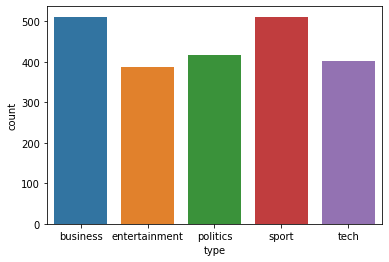

In [14]:
sns.countplot(df.type)

In [20]:
news_df=df.copy()

In [22]:
news_df.head()

,news,type
0,b'FBI agent colludes with analyst\n\nA former ...,business
1,"b""India's Maruti sees profits jump\n\nIndia's ...",business
2,b'UK young top Euro earnings league\n\nBritish...,business
3,b'Virgin Blue shares plummet 20%\n\nShares in ...,business
4,b'China suspends 26 power projects\n\nChina ha...,business


In [23]:
new=news_df['news'][0]
new

b'FBI agent colludes with analyst\n\nA former FBI agent and an internet stock picker have been found guilty of using confidential US government information to manipulate stock prices.\n\nA New York court ruled that former FBI man Jeffrey Royer, 41, fed damaging information to Anthony Elgindy, 36. Mr Elgindy then drove share prices lower by spreading negative publicity via his newsletter. The Egyptian-born analyst would extort money from his targets in return for stopping the attacks, prosecutors said. "Under the guise of protecting investors from fraud, Royer and Elgindy used the FBI\'s crime-fighting tools and resources actually to defraud the public," said US Attorney Roslynn Mauskopf.\n\nMr Royer was convicted of racketeering, securities fraud, obstruction of justice and witness tampering. Mr Elgindy was convicted of racketeering, securities fraud and extortion.\n\nThe charges carry sentences of up to 20 years. When the guilty verdict was announced by the jury foreman, Mr Elgindy dr

In [24]:
new[0:]

b'FBI agent colludes with analyst\n\nA former FBI agent and an internet stock picker have been found guilty of using confidential US government information to manipulate stock prices.\n\nA New York court ruled that former FBI man Jeffrey Royer, 41, fed damaging information to Anthony Elgindy, 36. Mr Elgindy then drove share prices lower by spreading negative publicity via his newsletter. The Egyptian-born analyst would extort money from his targets in return for stopping the attacks, prosecutors said. "Under the guise of protecting investors from fraud, Royer and Elgindy used the FBI\'s crime-fighting tools and resources actually to defraud the public," said US Attorney Roslynn Mauskopf.\n\nMr Royer was convicted of racketeering, securities fraud, obstruction of justice and witness tampering. Mr Elgindy was convicted of racketeering, securities fraud and extortion.\n\nThe charges carry sentences of up to 20 years. When the guilty verdict was announced by the jury foreman, Mr Elgindy dr

In [27]:
news_df['news']=news_df['news'].astype('str')

In [28]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [29]:
news_df["filtered"] = news_df['news'].apply(remove_punctuations)

In [30]:
news_df

,news,type,filtered
0,b'FBI agent colludes with analyst\n\nA former ...,business,bFBI agent colludes with analystnnA former FBI...
1,"b""India's Maruti sees profits jump\n\nIndia's ...",business,bIndias Maruti sees profits jumpnnIndias bigge...
2,b'UK young top Euro earnings league\n\nBritish...,business,bUK young top Euro earnings leaguennBritish ch...
3,b'Virgin Blue shares plummet 20%\n\nShares in ...,business,bVirgin Blue shares plummet 20nnShares in Aust...
4,b'China suspends 26 power projects\n\nChina ha...,business,bChina suspends 26 power projectsnnChina has o...
...,...,...,...
2220,b'Games win for Blu-ray DVD format\n\nThe next...,tech,bGames win for Bluray DVD formatnnThe nextgene...
2221,b'File-swappers ready new network\n\nLegal att...,tech,bFileswappers ready new networknnLegal attacks...
2222,b'US blogger fired by her airline\n\nA US airl...,tech,bUS blogger fired by her airlinennA US airline...
2223,b'Tough rules for ringtone sellers\n\nFirms th...,tech,bTough rules for ringtone sellersnnFirms that ...


In [31]:
news_df['filtered'][0]

'bFBI agent colludes with analystnnA former FBI agent and an internet stock picker have been found guilty of using confidential US government information to manipulate stock pricesnnA New York court ruled that former FBI man Jeffrey Royer 41 fed damaging information to Anthony Elgindy 36 Mr Elgindy then drove share prices lower by spreading negative publicity via his newsletter The Egyptianborn analyst would extort money from his targets in return for stopping the attacks prosecutors said Under the guise of protecting investors from fraud Royer and Elgindy used the FBIs crimefighting tools and resources actually to defraud the public said US Attorney Roslynn MauskopfnnMr Royer was convicted of racketeering securities fraud obstruction of justice and witness tampering Mr Elgindy was convicted of racketeering securities fraud and extortionnnThe charges carry sentences of up to 20 years When the guilty verdict was announced by the jury foreman Mr Elgindy dropped his face into his hands an